# AI Project - Phase 2 (Destination Suggestion)
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> DR. Mahdieh Soleymani | DR. MohammadHossein Rohban </h2>
<h3 style = "color: cyan"> Head of Project: AmirHossein Razlighi <h3>
<h3 style = "color: cyan"> Designed By: AmirHossein Razlighi, Javad Hezareh, Payam Taebi, Alireza Sakhaei, Ali Banayeean, Yalda Shabanzadeh, Hamidreza Yaghoubi, Alireza Heidari <h3>
<h4 style = "color: white"> Ask your questions via quera</h4>
<h5> Save your file with format: STUDENT NUMBER_Phase2.ipynb or .zip </h5>
</div>

## Overview

<div style="text-align: center">
<img src="./Images/Uber_research.jpg" width="100%" height="auto" />
</div>

Suppose you are a research engineer at Uber and you are asked to design a system that suggests destinations to the passengers. The system should be able to suggest destinations based on the passenger's history. For example, one passenger may save a variety of locations (like home, work, gym, etc.). This passenger may go to gym, often on weekends and when he/she requests a car from Home.

So, for example, if I am a student, going to university usually from Saturday to Wednesday on 8:00 from "home", the next time I request a car from "home" on 8:00, the system should suggest "university" as the destination. Now, it's not that simple always, so we should seek for smart wayys to solve this problem!

As you may understood by now, we should engineer some of features from the data we have and try to predict the next destination of the passenger.

Let's begin!

## Setup

In [1]:
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

random.seed(2024)
np.random.seed(2024)

# First Approach: Using KNN

## Data Preparation for KNN

In this part, you should prepare the data for KNN. You should load the dataset file that we provided, named `Data/output.json` and then clean it, do all the required preprocessings and then split into train-test-val sets if necessary. Note that we provided a splitted test set for you, named `Data/output_test.json`. You should not use this file for training or validation. You should only use it for testing your model.

In [2]:
# TODO: Load the dataset for training
train_df = pd.read_json('Data/output.json')
train_df.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,0,0,35.625,51.375,36.000,51.085,2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,36.000,51.085,35.625,51.375,2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,35.680,51.445,35.745,51.465,2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,35.745,51.465,35.680,51.445,2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,35.625,51.375,35.680,51.445,2024-01-30 23:38:00,2024-01-30 23:58:00,19.48


In [3]:
# TODO: Load the dataset for testing
test_df = pd.read_json('Data/output_test.json')
test_df.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,24,6,35.650,51.225,35.640,51.270,2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,35.625,51.250,35.690,51.295,2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,35.650,51.225,35.865,51.045,2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,35.875,51.375,35.890,51.315,2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,35.625,51.375,35.650,51.385,2024-01-30 13:16:00,2024-01-30 13:19:00,15.08


In [4]:
# print out the number of unique users and also randomly select one user
users = train_df.user_id.unique()
print(len(users))
random_idx = np.random.randint(60)
random_user = users[random_idx]
print(random_user)

60
8


In [6]:
# %pip install keplergl
from keplergl import KeplerGl

# Uncomment the following line if you are using Google Colab
from google.colab import output
output.enable_custom_widget_manager()

In [7]:
# choose the data related to the randomly selected user
# show destinations of this user on map
# You should Use Kepler.gl to visualize the data

selected_user_data = train_df[train_df['user_id'] == random_user]
selected_user_data

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
2088,8,0,35.625,51.125,35.505,51.180,2024-01-30 12:54:00,2024-01-30 13:15:00,13.12
2089,8,0,35.505,51.180,35.625,51.125,2024-01-30 13:45:00,2024-01-30 14:08:00,17.11
2090,8,1,35.700,51.210,35.785,51.315,2024-01-30 21:01:00,2024-01-30 21:23:00,20.42
2091,8,1,35.785,51.315,35.700,51.210,2024-01-30 21:53:00,2024-01-30 22:22:00,22.06
2092,8,2,35.700,51.210,35.625,51.125,2024-01-30 07:59:00,2024-01-30 08:17:00,26.41
...,...,...,...,...,...,...,...,...,...
2406,8,0,35.500,51.500,35.625,51.125,2024-01-30 07:16:00,2024-01-30 08:30:00,41.84
2407,8,0,35.625,51.125,35.565,51.060,2024-01-30 12:45:00,2024-01-30 12:59:00,10.00
2408,8,0,35.565,51.060,35.625,51.125,2024-01-30 13:29:00,2024-01-30 13:50:00,11.60
2409,8,0,35.575,51.245,35.750,51.385,2024-01-30 20:21:00,2024-01-30 21:03:00,23.49


In [8]:
# Sample output:
KeplerGl(height=600, data={'user_locations': selected_user_data}, show_docs=False)

KeplerGl(data={'user_locations':       user_id  Day  origin lat  origin lon  dest lat  dest lon  \
2088       …

Here, you should do feature engineering stuff! Extract the features that you think are important. Split the features into training set and also extract the related outputs (used for our model further). These outputs may be strings (name of destination) or destination's latitude/longitude or etc. Use your creativity!

In [9]:
def extract_x_y(df):
    x = df.iloc[:, [i for i in range(9) if i not in [4, 5]]]
    x = df.iloc[:, :4]
    y = pd.DataFrame()
    y['dest'] = df.iloc[:, 4:6].apply(lambda row: (row['dest lat'], row['dest lon']), axis=1)
    return {'x': x, 'y': y}


train_data = extract_x_y(train_df)
test_data = extract_x_y(test_df)

class_to_coordinate = {i: dest for (i, dest) in enumerate(train_data['y'].dest.unique())}
coordinate_to_class = {dest: i for (i, dest) in enumerate(train_data['y'].dest.unique())}

train_data['y']['class'] = train_data['y'].apply(lambda row: coordinate_to_class[row['dest']], axis=1)
train_data['y'] = train_data['y']['class']

test_data['y']['class'] = test_data['y'].apply(lambda row: coordinate_to_class[row['dest']], axis=1)
test_data['y'] = test_data['y']['class']

In [10]:
# print out the shape of the train and test dataframes
print(train_data['x'].shape, train_data['y'].shape)
print(test_data['x'].shape, test_data['y'].shape)

(17994, 4) (17994,)
(4499, 4) (4499,)


## KNN Model

In this section, we are going to implement our KNN model. For further information on how KNN works, please refer to [this](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) link. As you can see, it's a simple algorithm. We will start with this and see the results of our _destination suggestion_ system.

In [11]:
# Define the model
# TODO: You can change the signature of functions and also add any function you need

class NearestNeighbor():
    def __init__(self, k=5):
        self.k = k
        self.weights = np.array([1e6, 1e5, 1e3, 1e-2])


    def fit(self, train_X, train_y):
        x = train_X.to_numpy()
        feature_score = np.matmul(x, self.weights)
        y = np.squeeze(train_y.to_numpy())
        self.result = np.stack((feature_score, y), axis=1)


    def predict(self, x: pd.DataFrame):
        # print(np.unique(self.result[:, 0]).shape)
        x = x.to_numpy()
        feature_score = np.matmul(x, self.weights)
        # print(feature_score)
        # print(self.result[:, 0])

        # print(np.sum(self.result[:, 0]==feature_score[-2]))
        # print(self.result[:, 0]==feature_score[-2])
        # for i, r in enumerate(self.result[:, 0]==feature_score[-2]):
        #     if r:
        #         print(i)
        # print(feature_score[self.result[:, 0]==feature_score[-2]])
        prediction = []
        for score in feature_score:
            similarity = np.abs(self.result[:, 0] - score)
            # print(similarity)
            indices = np.argpartition(similarity, self.k)[:self.k]
            classes = self.result[:, 1][indices].astype(int)
            # print(similarity.sort())
            # print(similarity[indices])
            prediction.append(np.argmax(np.bincount(classes)))
            # if prediction[-1] != self.result[:, 1][len(prediction)-1]:
            #     print(similarity[indices])
            #     similarity.sort()
            #     print(similarity)
            #     break
        return prediction

In [12]:
# Fit the model on training data
knn = NearestNeighbor()
knn.fit(train_data['x'], train_data['y'])

In [13]:
# Calculate the accuracy on training data
# print(train_data['x'].iloc[[17577, 17992], :])
prediction = knn.predict(train_data['x'])
print(prediction)
print(train_data['y'].to_numpy())
# print(np.equal(prediction, train_data['y'].to_numpy()))
accuracy = np.sum(np.equal(prediction, train_data['y'].to_numpy()) == True) / len(prediction)
print(accuracy)

[3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 7, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 12, 3, 7, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 12, 7, 3, 7, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 12, 7, 3, 7, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 12, 3, 7, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 12, 3, 7, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 12, 3, 7, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 7, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 12, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 12, 3, 12, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 12, 3, 12, 3, 12, 3, 7, 3, 7, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 7, 12, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 12, 12, 3, 7, 3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 12, 3, 7,

In [14]:
# Calculate the accuracy on test data
prediction = knn.predict(test_data['x'])
print(prediction)
print(test_data['y'].to_numpy())
accuracy = np.sum(np.equal(prediction, test_data['y'].to_numpy()) == True) / len(prediction)
print(accuracy)

[80, 99, 83, 62, 83, 64, 108, 5, 34, 57, 34, 102, 69, 35, 93, 34, 84, 57, 68, 7, 88, 101, 91, 75, 68, 4, 87, 77, 8, 34, 68, 60, 68, 1, 48, 1, 57, 75, 101, 64, 8, 68, 62, 64, 8, 88, 64, 70, 76, 48, 63, 34, 70, 76, 34, 79, 6, 96, 57, 65, 34, 69, 10, 102, 28, 93, 21, 80, 88, 49, 57, 64, 68, 93, 12, 60, 57, 68, 69, 64, 34, 0, 25, 102, 92, 60, 26, 1, 64, 1, 91, 68, 81, 101, 82, 64, 102, 1, 1, 68, 60, 1, 64, 1, 103, 3, 21, 68, 61, 1, 61, 64, 64, 94, 6, 1, 35, 68, 68, 57, 81, 6, 36, 102, 68, 36, 89, 100, 1, 92, 96, 35, 53, 34, 40, 60, 64, 57, 63, 76, 47, 59, 64, 104, 26, 82, 87, 57, 68, 68, 68, 2, 57, 101, 68, 57, 68, 1, 93, 107, 59, 54, 7, 60, 34, 46, 64, 54, 64, 67, 80, 57, 64, 104, 92, 68, 103, 47, 57, 54, 6, 65, 1, 34, 96, 1, 94, 64, 57, 6, 64, 57, 16, 17, 64, 2, 65, 57, 57, 6, 1, 6, 61, 57, 87, 57, 57, 29, 8, 54, 28, 107, 9, 11, 81, 48, 77, 68, 75, 91, 104, 68, 32, 101, 0, 34, 57, 69, 53, 64, 63, 78, 89, 82, 4, 57, 0, 68, 1, 47, 68, 96, 57, 75, 84, 64, 12, 68, 11, 34, 64, 26, 64, 1, 62, 

**QUESTION**: What do you think about this approach? Is it a good idea to use KNN for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: ...

# Second Approach: Using XGBoost

In this part, we are going to use XGBoost to predict the next destination of the passenger. You can use `xgboost` library to implement this model. To learn more about XGBoost, please refer to [this](https://en.wikipedia.org/wiki/XGBoost) link. It should be familiar to you, as you saw decision trees in the class.

For this part, you can use the same data (that you did all the processes on) from the previous part. Or, if you need, you can reload the dataset and do new preprocessings on it.

You can see the overview of how XGBoost works in the image below:

<dev style="text-align: center">
<img src="./Images/XGBoost.png" />
</dev>

Although, this is for more information and you **do not** need to implement `XGBoost` from scratch. You can use the library that we mentioned above.

In [245]:
%pip install xgboost

In [16]:
import xgboost as xgb

# Defining the model
# TODO: You can change the signature of functions and also add any function you need
class Encoder():
    # def __init__(self):
    #     pass


    def fit(self, y):
        y = y.to_numpy().flatten()
        self.classes = np.unique(y)
        self.idx_to_class = {i: clas for i, clas in enumerate(self.classes)}
        self.class_to_idx = {clas: i for i, clas in enumerate(self.classes)}


    def transform(self, y):
        y = y.to_numpy().flatten()
        return np.array([self.class_to_idx[c] for c in y])


    def inverse_transform(self, enc):
        y = y.to_numpy().flatten()
        return np.array([self.idx_to_class[idx] for idx in enc])

In [17]:
# TODO: fit the Encoder on training data
def extract_x_y(df):
    x = df.iloc[:, [i for i in range(9) if i not in [4, 5]]]
    x = df.iloc[:, :4]
    y = pd.DataFrame()
    y['dest'] = df.iloc[:, 4:6].apply(lambda row: (row['dest lat'], row['dest lon']), axis=1)
    return {'x': x, 'y': y}


train_data = extract_x_y(train_df)
test_data = extract_x_y(test_df)

enc = Encoder()
enc.fit(train_data['y'])

In [18]:
# TODO: transform the training and test data
# and fit the model on training data
train_data['y'] = pd.DataFrame(enc.transform(train_data['y']))
test_data['y'] = pd.DataFrame(enc.transform(test_data['y']))

classifier = xgb.XGBClassifier()
classifier.fit(train_data['x'], train_data['y'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
# TODO: print out train-data accuracy
prediction = classifier.predict(train_data['x'])
print(prediction)
print(train_data['y'].to_numpy().flatten())
accuracy = np.sum(np.equal(prediction, train_data['y'].to_numpy().flatten()) == True) / len(prediction)
print(accuracy)

[41 29 29 ... 21  5 96]
[107  29  53 ...   7  70  96]
0.6726686673335557


In [20]:
# TODO: print out test-data accuracy
prediction = classifier.predict(test_data['x'])
print(prediction)
print(test_data['y'].to_numpy().flatten())
accuracy = np.sum(np.equal(prediction, test_data['y'].to_numpy().flatten()) == True) / len(prediction)
print(accuracy)

[33 92 24 ... 27 74 74]
[33 43 78 ... 14 74 74]
0.5730162258279617


**QUESTION**: What do you think about this approach? Is it a good idea to use XGBoost for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: ...

**Question**: Please explain the problem of overfitting in XGBoost. How can you solve it? Provide a brief explanation.

Your Answer: By not considering some of the features, we can prevent the model from overfitting the data.

# Third Approach: Classifier Using Neural Networks

In this approach, we are going to use a classifier using neural networks. You can think of this approach and how to model the problem as a classification problem in many ways! So, we are not going to restrict your creativity. Just a hint: You can consider each of the unique destinations (in whole dataset) as a class and then train a classifier to classify the destinations.

## Data for Neural Network

Let's prepare the data for our neural network. Again, you should extract required features from the dataset and then split the dataset into train-test-val sets if necessary. For your ease, we prepared another version of `output.json` that helps you to extract features for this part, easier. So, please load `Data/trip_data.json` and use it for training set and validation set. You should use `Data/trip_data_test.json` for testing your model.

In [141]:
# load the training dataset
train_df = pd.read_json('Data/trip_data.json')
train_df.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,0,0,"[work, [35.625, 51.375]]","[restaurant, [36.0, 51.085]]",2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,"[restaurant, [36.0, 51.085]]","[work, [35.625, 51.375]]",2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,"[home, [35.68, 51.445]]","[restaurant, [35.745, 51.465]]",2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,"[restaurant, [35.745, 51.465]]","[home, [35.68, 51.445]]",2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,"[work, [35.625, 51.375]]","[home, [35.68, 51.445]]",2024-01-30 23:38:00,2024-01-30 23:58:00,19.48


In [142]:
# load the test dataset
test_df = pd.read_json('Data/trip_data_test.json')
test_df.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,24,6,"[pool, [35.65, 51.225]]","[home, [35.64, 51.27]]",2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,"[university, [35.625, 51.25]]","[restaurant, [35.69, 51.295]]",2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,"[pool, [35.65, 51.225]]","[restaurant, [35.865, 51.045]]",2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,"[work, [35.875, 51.375]]","[home, [35.89, 51.315]]",2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,"[work, [35.625, 51.375]]","[restaurant, [35.65, 51.385]]",2024-01-30 13:16:00,2024-01-30 13:19:00,15.08


In [143]:
# Extract features and do preprocessing if needed
def preprocess_dataframe(df):
    df['start_time'] = df.apply(lambda row: row['start_time'].time(), axis=1)
    df['end_time'] = df.apply(lambda row: row['end_time'].time(), axis=1)
    df['origin lat'] = df.apply(lambda row: row['origin'][1][0], axis=1)
    df['origin lon'] = df.apply(lambda row: row['origin'][1][1], axis=1)
    df['dest lat'] = df.apply(lambda row: row['destination'][1][0], axis=1)
    df['dest lon'] = df.apply(lambda row: row['destination'][1][1], axis=1)
    df['origin'] = df.apply(lambda row: row['origin'][0], axis=1)
    df['destination'] = df.apply(lambda row: row['destination'][0], axis=1)


preprocess_dataframe(train_df)
train_df.head()

,user_id,Day,origin,destination,start_time,end_time,price,origin lat,origin lon,dest lat,dest lon
0,0,0,work,restaurant,13:07:00,14:43:00,43.99,35.625,51.375,36.000,51.085
1,0,0,restaurant,work,15:13:00,16:49:00,36.66,36.000,51.085,35.625,51.375
2,0,0,home,restaurant,20:41:00,20:54:00,15.08,35.680,51.445,35.745,51.465
3,0,0,restaurant,home,21:24:00,21:37:00,10.00,35.745,51.465,35.680,51.445
4,0,1,work,home,23:38:00,23:58:00,19.48,35.625,51.375,35.680,51.445


In [144]:
# Extract features and do preprocessing if needed
preprocess_dataframe(test_df)
test_df.head()

,user_id,Day,origin,destination,start_time,end_time,price,origin lat,origin lon,dest lat,dest lon
0,24,6,pool,home,11:58:00,12:12:00,10.00,35.650,51.225,35.640,51.270
1,46,2,university,restaurant,21:58:00,22:18:00,11.84,35.625,51.250,35.690,51.295
2,27,5,pool,restaurant,20:05:00,20:58:00,23.36,35.650,51.225,35.865,51.045
3,7,4,work,home,17:39:00,18:17:00,13.74,35.875,51.375,35.890,51.315
4,27,3,work,restaurant,13:16:00,13:19:00,15.08,35.625,51.375,35.650,51.385


In [145]:
# print out the unique values for each column
for column in train_df.columns:
    values = train_df[column].unique().astype(str)
    print(f'Column: {column}')
    print('Unique values:')
    print(', '.join(values))
    print('========================================\n')

Column: user_id
Unique values:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59

Column: Day
Unique values:
0, 1, 2, 3, 4, 6, 5

Column: origin
Unique values:
work, restaurant, home, park, university, gym, pool

Column: destination
Unique values:
restaurant, work, home, park, university, gym, pool

Column: start_time
Unique values:
13:07:00, 15:13:00, 20:41:00, 21:24:00, 23:38:00, 07:59:00, 21:19:00, 07:55:00, 14:11:00, 20:08:00, 21:03:00, 07:00:00, 13:50:00, 14:23:00, 21:40:00, 22:28:00, 20:28:00, 22:01:00, 12:05:00, 12:54:00, 17:29:00, 13:44:00, 14:59:00, 17:36:00, 07:49:00, 20:40:00, 22:21:00, 17:33:00, 21:51:00, 07:54:00, 13:35:00, 16:30:00, 22:35:00, 08:19:00, 11:24:00, 08:56:00, 12:17:00, 07:06:00, 07:42:00, 13:15:00, 13:53:00, 21:20:00, 07:51:00, 12:37:00, 13:40:00, 17:32:00, 20:46:00, 21:38:00, 22:07:

In [146]:
# print out the data type of each column
print('DataFrame Column Head and Data Type:')
print('========================================')
for column, dtype in zip(train_df.columns, train_df.dtypes):
    print(f'Column: {column}')
    print(f'Data Type: {dtype}')
    print('----------------------------------------')

DataFrame Column Head and Data Type:
Column: user_id
Data Type: int64
----------------------------------------
Column: Day
Data Type: int64
----------------------------------------
Column: origin
Data Type: object
----------------------------------------
Column: destination
Data Type: object
----------------------------------------
Column: start_time
Data Type: object
----------------------------------------
Column: end_time
Data Type: object
----------------------------------------
Column: price
Data Type: float64
----------------------------------------
Column: origin lat
Data Type: float64
----------------------------------------
Column: origin lon
Data Type: float64
----------------------------------------
Column: dest lat
Data Type: float64
----------------------------------------
Column: dest lon
Data Type: float64
----------------------------------------


Based on your features and how you extracted them, you may need to use some encodings for your data. For example, if you have different classes as names (`str` data type. E.g. "gym") you need to make it a numeric value in order to feed it into your neural network. You can use `sklearn`'s functions (such as `LabelEncoder`, `OneHotEncoder`, `StandardScaler`, etc.) to do these kind of stuff!

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
train_df['origin'] = le.fit_transform(train_df['origin'])
train_df['destination'] = le.transform(train_df['destination'])

test_df['origin'] = le.transform(test_df['origin'])
test_df['destination'] = le.transform(test_df['destination'])

def time_to_int(df):
    df['start_time'] = df.apply(lambda row: 60*row['start_time'].hour+row['start_time'].minute, axis=1)
    df['end_time'] = df.apply(lambda row: 60*row['end_time'].hour+row['end_time'].minute, axis=1)

time_to_int(train_df)
time_to_int(test_df)

def standardize_x(df):
    columns = ['start_time', 'end_time', 'price', 'origin lat', 'origin lon']
    # columns = ['start_time', 'end_time', 'price', 'origin lat', 'origin lon', 'dest lat', 'dest lon']
    # columns = ['price', 'origin lat', 'origin lon', 'dest lat', 'dest lon']
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])


def standardize_y(df):
    columns = ['dest lat', 'dest lon']
    # columns = ['price', 'origin lat', 'origin lon', 'dest lat', 'dest lon']
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])


x_train = train_df.drop(['destination', 'dest lat', 'dest lon'], axis=1)
y_train = train_df.loc[:, ['destination', 'dest lat', 'dest lon']]
x_test = test_df.drop(['destination', 'dest lat', 'dest lon'], axis=1)
y_test = test_df.loc[:, ['destination', 'dest lat', 'dest lon']]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=37)

for x in [x_train, x_val, x_test]:
    standardize_x(x)
for y in [y_train, y_val, y_test]:
    standardize_y(y)

Create `train_dataset` and its loader, also create `test_dataset` and its loader. You should also create `val_dataset` and its loader if you want to use validation set. You may need to implement a custom `torch.Dataset` class for your ease. Your loaders should be able to load data in batches.

In [237]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.x = torch.tensor(x.values).to(torch.float32)
        self.y = torch.tensor(y.values).to(torch.float32)

    def __len__(self):
        # return x.shape[0]
        return len(x)

    def __getitem__(self, index):
        features = self.x[index]
        label = self.y[index][0]
        return features, label


train_dataset = CustomDataset(x_train, y_train)
val_dataset = CustomDataset(x_val, y_val)
test_dataset = CustomDataset(x_test, y_test)

# print(len(train_dataset))
# print(train_dataset[2])

# Batch size
batch_size = 128

# DataLoader
train_loader = DataLoader(train_dataset, batch_size)
val_loader = DataLoader(val_dataset, batch_size)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

## Neural Network Model

Here, you should implement your neural network model. You should use `pytorch`. **Note** that you should plot the loss function of your model during the training phase. (on both training and validation sets)

In [238]:
import torch.nn.functional as F
import torch.optim as optim

# number_of_unique_destinations = len(train_df['destination'].unique())
number_of_unique_destinations = len(le.classes_)


# Implement the MLP class with your choice of architecture
# TODO: You can change the signature of functions and also add any function you need
class MLP(nn.Module):
    def __init__(self, input_dim=8, output_dim=number_of_unique_destinations):
        super().__init__()

        number_of_layer1_hidden_neurons = 16
        number_of_layer2_hidden_neurons = 8
        self.hidden1 = nn.Linear(input_dim, number_of_layer1_hidden_neurons)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(number_of_layer1_hidden_neurons, number_of_layer2_hidden_neurons)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(number_of_layer2_hidden_neurons, output_dim)
        self.out_act = nn.Softmax()


    def forward(self, x):
        x = self.hidden1(x)
        x = self.act1(x)
        x = self.hidden2(x)
        x = self.act2(x)
        x = self.output(x)
        x = self.out_act(x)
        return x


# Define Model, Loss, Optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


# Implement the train_model function
def train_model(model, train_loader, criterion, optimizer, epochs=100):
    model.train()
    train_loss = []
    for i in range(epochs):
        epoch_loss = 0
        for train_inputs, train_labels in train_loader:
            predicts = model(train_inputs)

            loss = criterion(predicts, train_labels.long())

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

            epoch_loss += loss.item()
        epoch_loss /= len(train_loader)
        # print(f'Epoch {1}/{epochs}, Train Loss: 1.0487864697296945, Val Loss: 0.825067044099172')
        print(f'Epoch {i+1}/{epochs}, Train Loss: {epoch_loss}')
        train_loss.append(epoch_loss)
    return train_loss



def eval_model(model, val_loader, criterion, epochs=100):
    model.eval()
    eval_loss = []
    for i in range(epochs):
        epoch_loss = 0
        for val_inputs, val_labels in val_loader:
            predicts = model(val_inputs)

            loss = criterion(predicts, val_labels.long())
            epoch_loss += loss.item()

        epoch_loss /= len(val_loader)
        print(f'Epoch {i+1}/{epochs}, Val Loss: {epoch_loss}')
        eval_loss.append(epoch_loss/len(val_loader))
    return eval_loss


def train_eval_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    # model.train()
    train_loss = []
    eval_loss = []
    for i in range(epochs):
        epoch_loss = 0
        for train_inputs, train_labels in train_loader:
            predicts = model(train_inputs)

            loss = criterion(predicts, train_labels.long())

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

            epoch_loss += loss.item()
        epoch_loss /= len(train_loader)
        # print(f'Epoch {i+1}/{epochs}, Train Loss: {epoch_loss}')
        train_loss.append(epoch_loss)

        epoch_loss = 0
        for val_inputs, val_labels in val_loader:
            predicts = model(val_inputs)

            loss = criterion(predicts, val_labels.long())
            epoch_loss += loss.item()

        epoch_loss /= len(val_loader)
        # print(f'Epoch {i+1}/{epochs}, Val Loss: {epoch_loss}')
        eval_loss.append(epoch_loss/len(val_loader))
        print(f'Epoch {i+1}/{epochs}, Train Loss: {train_loss[-1]}, Val Loss: {eval_loss[-1]}')
    return train_loss, eval_loss

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 1/100, Train Loss: 1.9284427165985107, Val Loss: 1.9032610654830933
Epoch 2/100, Train Loss: 1.9098941087722778, Val Loss: 1.897621750831604
Epoch 3/100, Train Loss: 1.9034289121627808, Val Loss: 1.8937987089157104
Epoch 4/100, Train Loss: 1.8983452320098877, Val Loss: 1.8908047676086426
Epoch 5/100, Train Loss: 1.8941551446914673, Val Loss: 1.888083815574646
Epoch 6/100, Train Loss: 1.8906141519546509, Val Loss: 1.8854660987854004
Epoch 7/100, Train Loss: 1.8875232934951782, Val Loss: 1.8829673528671265
Epoch 8/100, Train Loss: 1.8847832679748535, Val Loss: 1.8806164264678955
Epoch 9/100, Train Loss: 1.8822882175445557, Val Loss: 1.8784356117248535
Epoch 10/100, Train Loss: 1.8799630403518677, Val Loss: 1.8764137029647827
Epoch 11/100, Train Loss: 1.8777803182601929, Val Loss: 1.8744704723358154
Epoch 12/100, Train Loss: 1.8755699396133423, Val Loss: 1.8724913597106934
Epoch 13/100, Train Loss: 1.8733497858047485, Val Loss: 1.8700343370437622
Epoch 14/100, Train Loss: 1.87101101

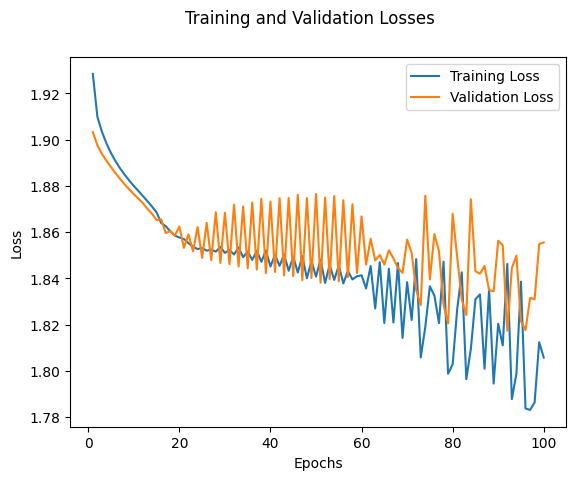

In [239]:
epochs = 100

# train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)
# train_loss = train_model(model, train_loader, criterion, optimizer, epochs=100)
# eval_loss = eval_model(model, val_loader, criterion, epochs=100)
train_loss, eval_loss = train_eval_model(model, train_loader, val_loader, criterion, optimizer, epochs)

# fig, ax = plt.subplots(figsize=(20, 25))
fig, ax = plt.subplots()
# fig.suptitle('Training and Validation Losses', fontsize=25, y=0.92)
fig.suptitle('Training and Validation Losses')


x = range(1, epochs+1)
y = train_loss
ax.plot(x, y, label='Training Loss')

x = range(1, epochs+1)
y = eval_loss
ax.plot(x, y, label='Validation Loss')

ax.set(xlabel='Epochs', ylabel='Loss')
ax.legend()

## Evaluate Neural Network Model

Report the model's accuracy on the test set.

In [ ]:
# report model accuracy on test data
model.eval()
# TODO

Accuracy: 0.8993109579906646


Just for the sake of curiosity, let's take a random sample from the test set and see the model's prediction. So, randomly choose a sample from the test set and print it out (to see its features and also the correct output). Then, feed the features into your model and see what it predicts. Is it correct?

In [ ]:
import random
# TODO: choose a random sample from test data and print it out

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Long,Dest Lat,Dest Long
3850,13,-0.355805,4,6,0.086474,0.273943,1.75831,1.744438,-1.29894,35.625,51.375


In [ ]:
# TODO: predict the destination of the above sample
# print out the prediction

Predicted: 6


In [ ]:
# TODO: print out the actual destination of the above sample

Actual: 6


Now, use the inverse transform of the encoding you used earlier to get the name of the destination from the predicted class. Print it out and see if it's correct.

In [ ]:
# TODO: use inverse_transform to print out the actual name of destination of the above sample

Name of predicted destination: work


**QUESTION**: What do you think about this approach? Is it a good idea to use Neural Networks for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: ...

# How to Submit:

Please upload your notebook (`.ipynb`) compressed (as a `.zip` file) or uncompressed on Quera. **Note** that for each part, the accuracy of your model on the given test dataset is important. So, your accuracy should be **at least** same as ours (or better). Also, we will check your code after the submission. So, please make sure that there are no **data snooping** or **data leakage** in your code. You **can not** use the test data in any stages for your model, except for the final evaluation part! So, please be ware of that, or you may lose points.

Your project is graded via 2 main parts:
1. Checking out your implementation (to check if there are no "data snooping" and "data leakage")
   
2. Checking accuracies of your models on the test set.

3. Running again your code by you in the "in-person" session and hearing your explanations (on the parts that we asked questions about the models, overfitting and etc. with tag "QUESTION" in the notebook).